In [7]:
import geopandas as gpd
import pandas as pd
import gdal
import descartes
import shapely
import matplotlib.pyplot as plt

### <a id="data_ac">Data Acquisition</a>

Dublin Postcodes from https://github.com/AugmentedGeoBae/GeoCluster
<br>Converted to shapefile in order to import it with geopandas

In [2]:
gdf = gpd.read_file('mygeodata/DublinPostcodes_4326-polygon.shp')

In [3]:
print(gdf.shape)

(24, 2)


In [4]:
print(gdf.head())

   id                                           geometry
0   0  POLYGON ((-6.33272 53.37071, -6.33274 53.37072...
1   1  POLYGON ((-6.25925 53.36170, -6.24931 53.35908...
2   2  POLYGON ((-6.26780 53.34588, -6.25454 53.34802...
3   3  POLYGON ((-6.21911 53.35739, -6.22102 53.35491...
4   4  POLYGON ((-6.23737 53.34359, -6.23052 53.34304...


<Figure size 1152x1152 with 0 Axes>

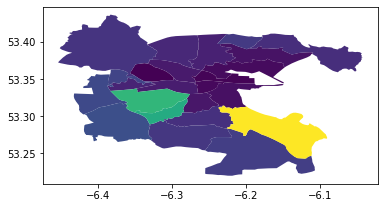

In [5]:
plt.figure(figsize = (16,16))
gdf.plot(column='id')

plt.show()

Getting the list of restaurants

In [16]:
df = pd.read_csv('Features_csv/Restaurant_List_scope.csv')

In [19]:
df_points = df[['Link', 'Latitude', 'Longitude']].copy()

In [20]:
df_points.head(1)

,Link,Latitude,Longitude
0,/Restaurant_Review-g186605-d10387074-Reviews-T...,53.34872,-6.258399


Transforming the dataframe in a geodataframe

In [21]:
gdf_points = gpd.GeoDataFrame(df_points, geometry=gpd.points_from_xy(df_points.Longitude, df_points.Latitude))

In [25]:
gdf_points.head(1)

,Link,Latitude,Longitude,geometry
0,/Restaurant_Review-g186605-d10387074-Reviews-T...,53.34872,-6.258399,POINT (-6.25840 53.34872)


The coordinate reference system (CRS) has to match in order to merge the dataframes and check if a point is inside a district (polygon)

In [26]:
gdf_points.crs = gdf.crs

In [27]:
joinDF=gpd.sjoin(gdf_points, gdf, how='left',op="within")

In [29]:
joinDF.drop(columns=['Latitude', 'Longitude', 'index_right'], inplace=True)

In [32]:
joinDF.drop(columns=['geometry'], inplace=True)

In [30]:
joinDF.rename(columns={'id':'District'}, inplace=True)

In [35]:
joinDF.head()

,Link,District
0,/Restaurant_Review-g186605-d10387074-Reviews-T...,1.0
1,/Restaurant_Review-g186605-d13477650-Reviews-G...,2.0
2,/Restaurant_Review-g186605-d6403998-Reviews-Da...,8.0
3,/Restaurant_Review-g186605-d2239110-Reviews-Mu...,4.0
4,/Restaurant_Review-g186605-d15590976-Reviews-T...,8.0


In [43]:
joinDF.describe()

,District
count,1185.000000
mean,3.654852
std,5.309177
min,1.000000
25%,2.000000
50%,2.000000
75%,6.000000
max,66.000000


In [44]:
df_merged = pd.merge(df, joinDF, on='Link')

In [49]:
df_merged

,Name,Ranking,Reviews,Rating,Price,Cuisines,Address,Latitude,Longitude,Phone,Link,District
0,Tang Cafe,1,502,5.0,Cheap,"['Cafe', 'European', 'Healthy']","23c Dawson Street, Dublin D02 PW18 Ireland",53.348720,-6.258399,+353 86 391 5401,/Restaurant_Review-g186605-d10387074-Reviews-T...,1.0
1,Glovers Alley,3,193,5.0,Expensive,"['Irish', 'European', 'Vegetarian Friendly']","128 Stephen’s Green Fitzwilliam Hotel, Dublin ...",53.339644,-6.263466,+353 1 244 0733,/Restaurant_Review-g186605-d13477650-Reviews-G...,2.0
2,Darkey Kelly's Bar & Restaurant,4,1645,4.5,Average,"['Irish', 'Bar', 'European']","Fishamble Street ChristChruch, Dublin Ireland",53.343513,-6.271060,+353 83 346 4682,/Restaurant_Review-g186605-d6403998-Reviews-Da...,8.0
3,Mulberry Garden,5,909,4.5,Expensive,"['Irish', 'European', 'Contemporary']","Mulberry Lane Donnybrook, Dublin 04 Ireland",53.322659,-6.236801,+353 1 269 3300,/Restaurant_Review-g186605-d2239110-Reviews-Mu...,4.0
4,The Landmark,6,468,4.5,Average,"['Irish', 'Bar', 'European']","The Landmark 40 Wexford Street, Dublin D02 CH6...",53.337441,-6.265903,+353 1 537 9951,/Restaurant_Review-g186605-d15590976-Reviews-T...,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Grain & Grill,2031,15,2.5,NaN,"['Bar', 'Pub']","Naas Road Newlands cross, Dublin Ireland",53.338198,-6.271756,+353 1 464 0140,/Restaurant_Review-g186605-d12134678-Reviews-G...,8.0
1186,La Belle Fontaine,2040,16,2.0,NaN,NaN,"85 Marlborough St., Dublin Ireland",53.348315,-6.257470,NaN,/Restaurant_Review-g186605-d3844281-Reviews-La...,1.0
1187,Pizza Cafe,2042,3,1.0,NaN,['Pizza'],"40 Richmond Street South, Dublin D02 E439 Ireland",53.330850,-6.264575,+353 1 559 0206,/Restaurant_Review-g186605-d17707142-Reviews-P...,8.0
1188,+55 Sushi Bar,2044,10,1.5,NaN,"['Japanese', 'Sushi']","143 Parnell Street, Dublin Ireland",53.350484,-6.266296,+353 85 870 0491,/Restaurant_Review-g186605-d14056284-Reviews-5...,1.0


In [55]:
df_merged.District = df_merged.District.astype('Int64')

In [56]:
df_merged.to_csv('Features_csv/restaurants_districts.csv', index=False)

### <center><a href="./d.Hotels_Tourism_University-Cleaning_Data.ipynb#clean">NEXT CHAPTER</a></center>

#### <center> <a href="./../0.Table_of_Contents_Code.ipynb">Table of Contents</a><br></center>